# WeatherPy Analysis

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Weather_Output/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'The number of cities collected was: {len(cities)}.')
cities

The number of cities collected was: 606.


['taolanaro',
 'albany',
 'letlhakane',
 'kodiak',
 'chuy',
 'nizhneyansk',
 'garden city',
 'teguldet',
 'hukuntsi',
 'khandyga',
 'ushuaia',
 'ribeira grande',
 'upernavik',
 'dobele',
 'georgetown',
 'vardo',
 'hilo',
 'dakar',
 'catia la mar',
 'saint anthony',
 'alofi',
 'arraial do cabo',
 'rikitea',
 'cape town',
 'barrow',
 'khatanga',
 'isangel',
 'honiara',
 'yarmouth',
 'sivas',
 'almaznyy',
 'samusu',
 'douglas',
 'sabla',
 'alice springs',
 'luderitz',
 'hobart',
 'prince rupert',
 'yuci',
 'mataura',
 'weligama',
 'castro',
 'puerto escondido',
 'fortuna',
 'tingi',
 'chokurdakh',
 'hermanus',
 'illoqqortoormiut',
 'jamestown',
 'saint-augustin',
 'tuktoyaktuk',
 'tortoli',
 'monrovia',
 'port alfred',
 'linchuan',
 'goure',
 'lorengau',
 'saint george',
 'piacabucu',
 'calabozo',
 'mahebourg',
 'kununurra',
 'beringovskiy',
 'bluff',
 'tobermory',
 'zafra',
 'cayenne',
 'mariinskiy posad',
 'conroe',
 'rundu',
 'busselton',
 'kapaa',
 'puerto ayora',
 'amderma',
 'sibut'

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Identify base url for API call and units we want data to be displayed in
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [4]:
# Create blank DataFrame with desired columns headers and cities identified
weather_df = pd.DataFrame({'City': cities, 'Lat': '', 'Lng': '', 'Max Temp': '', 'Humidity': '', 
                           'Cloudiness': '', 'Wind Speed': '', 'Country': '', 'Date': ''})
weather_df

record_num = 1
set_num = 1

for index, row in weather_df.iterrows():
    
    city_query = query_url + row['City']
    response = requests.get(city_query).json()

    try:
        print(f'Processing Record {record_num} of Set {set_num} | {response["name"]}')

        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']

    except (KeyError, IndexError):
        print(f'City not found...Skipping')

    record_num += 1
    
    if record_num == 101:
        set_num += 1
        record_num = 1

City not found...Skipping
Processing Record 2 of Set 1 | Albany
Processing Record 3 of Set 1 | Letlhakane
Processing Record 4 of Set 1 | Saint Paul Harbor
Processing Record 5 of Set 1 | Chui
City not found...Skipping
Processing Record 7 of Set 1 | Garden City
Processing Record 8 of Set 1 | Tegul'det
Processing Record 9 of Set 1 | Hukuntsi
Processing Record 10 of Set 1 | Khandyga
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Ribeira Grande
Processing Record 13 of Set 1 | Upernavik
Processing Record 14 of Set 1 | Dobele
Processing Record 15 of Set 1 | George Town
Processing Record 16 of Set 1 | Vardø
Processing Record 17 of Set 1 | Hilo
Processing Record 18 of Set 1 | Dakar
Processing Record 19 of Set 1 | Catia La Mar
Processing Record 20 of Set 1 | Saint Anthony
Processing Record 21 of Set 1 | Alofi
Processing Record 22 of Set 1 | Arraial do Cabo
Processing Record 23 of Set 1 | Rikitea
Processing Record 24 of Set 1 | Cape Town
Processing Record 25 of Set 1 | Ba

Processing Record 8 of Set 3 | Qujing
Processing Record 9 of Set 3 | General Roca
Processing Record 10 of Set 3 | Kristianstad
Processing Record 11 of Set 3 | Mombetsu
Processing Record 12 of Set 3 | Raton
Processing Record 13 of Set 3 | Colac
Processing Record 14 of Set 3 | Bredasdorp
Processing Record 15 of Set 3 | Sobolevo
Processing Record 16 of Set 3 | Kaitangata
Processing Record 17 of Set 3 | Banda Aceh
Processing Record 18 of Set 3 | Kahului
Processing Record 19 of Set 3 | Port Elizabeth
Processing Record 20 of Set 3 | Grasse
Processing Record 21 of Set 3 | Mossamedes
Processing Record 22 of Set 3 | Vestmannaeyjar
Processing Record 23 of Set 3 | Port Hardy
Processing Record 24 of Set 3 | Abū Zabad
Processing Record 25 of Set 3 | Pangnirtung
Processing Record 26 of Set 3 | Nyurba
Processing Record 27 of Set 3 | Carballo
Processing Record 28 of Set 3 | Meulaboh
Processing Record 29 of Set 3 | Pimenta Bueno
Processing Record 30 of Set 3 | Westport
Processing Record 31 of Set 3 | D

Processing Record 14 of Set 5 | Linxia Chengguanzhen
Processing Record 15 of Set 5 | Gijang
Processing Record 16 of Set 5 | Asău
Processing Record 17 of Set 5 | Iki-Burul
Processing Record 18 of Set 5 | Honāvar
Processing Record 19 of Set 5 | Omboué
Processing Record 20 of Set 5 | Remanso
Processing Record 21 of Set 5 | Ahipara
Processing Record 22 of Set 5 | Minsk
Processing Record 23 of Set 5 | Leningradskiy
Processing Record 24 of Set 5 | Gravdal
Processing Record 25 of Set 5 | Maragogi
Processing Record 26 of Set 5 | Irbeyskoye
Processing Record 27 of Set 5 | Lewisporte
Processing Record 28 of Set 5 | Gaza
Processing Record 29 of Set 5 | San Cristobal
Processing Record 30 of Set 5 | Tereze
Processing Record 31 of Set 5 | Ancud
Processing Record 32 of Set 5 | Wenling
Processing Record 33 of Set 5 | Novy Urengoy
Processing Record 34 of Set 5 | Soe
Processing Record 35 of Set 5 | Kupino
Processing Record 36 of Set 5 | Mayumba
Processing Record 37 of Set 5 | Inhambane
City not found...

In [5]:
# Print the weather DataFrame
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taolanaro,,,,,,,,
1,albany,42.6001,-73.9662,58.17,43,100,7,US,1650569092
2,letlhakane,-21.4167,25.5833,60.3,85,5,11.9,BW,1650569672
3,kodiak,57.79,-152.407,40.51,65,75,14.97,US,1650569673
4,chuy,-33.6971,-53.4616,74.79,52,99,3.31,UY,1650569217
...,...,...,...,...,...,...,...,...,...
601,koslan,63.4564,48.8989,26.58,87,21,1.16,RU,1650569869
602,sibolga,1.7427,98.7792,77.16,83,99,3.94,ID,1650569870
603,severo-yeniseyskiy,60.3725,93.0408,27.93,98,100,3.04,RU,1650569870
604,wad madani,14.4012,33.5199,98.33,20,5,7.67,SD,1650569871


## Clean the DataFrame and write to a CSV

In [6]:
# Replace the blank cells with 'NaN' values and drop all rows containing NaN values
weather_df.dtypes

columns = []

for column in weather_df:
    columns.append(column)

for column in columns:
    weather_df[column].replace('', np.nan, inplace = True)

weather_df = weather_df.dropna(how = 'any')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,albany,42.6001,-73.9662,58.17,43.0,100.0,7.00,US,1.650569e+09
2,letlhakane,-21.4167,25.5833,60.30,85.0,5.0,11.90,BW,1.650570e+09
3,kodiak,57.7900,-152.4072,40.51,65.0,75.0,14.97,US,1.650570e+09
4,chuy,-33.6971,-53.4616,74.79,52.0,99.0,3.31,UY,1.650569e+09
6,garden city,42.3256,-83.3310,66.45,49.0,20.0,21.85,US,1.650570e+09
...,...,...,...,...,...,...,...,...,...
601,koslan,63.4564,48.8989,26.58,87.0,21.0,1.16,RU,1.650570e+09
602,sibolga,1.7427,98.7792,77.16,83.0,99.0,3.94,ID,1.650570e+09
603,severo-yeniseyskiy,60.3725,93.0408,27.93,98.0,100.0,3.04,RU,1.650570e+09
604,wad madani,14.4012,33.5199,98.33,20.0,5.0,7.67,SD,1.650570e+09


In [7]:
# Inspect the Data to see if there are any cities where the humidity is > 100%
max_humidity = weather_df['Humidity'].max()
max_humidity
print(f'Of the cities collected, the max humidity is: {max_humidity}.')

Of the cities collected, the max humidity is: 100.0.


In [17]:
# Export the cleaned DataFrame to a csv file
weather_df.to_csv(output_data_file, index = False, header = True)

In [15]:
# Convert Date column from Unix format to a readable date format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's')
# weather_df['Date_only'] = weather_df['Date'].dt.date
weather_df['Date_only'] = weather_df['Date_only'].dt.strftime('%d.%m.%Y')
weather_df.head(50)

/Users/graceolson/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


AttributeError: Can only use .dt accessor with datetimelike values

## Plot the Data

### Temperature (F) vs. Latitude

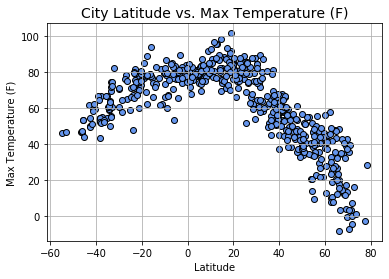

The plot shows cities closer to the equator (latitude 0 degrees) have higher max temperatures than those cities further from the equator. The plot also appears to confirms our initial hypothesis that the weather gets hotter as we move closer to the equator.


In [19]:
# Create a scatter plot of City Latitude vs. Max_Temperature
x_axis1 = weather_df['Lat']
y_axis1 = weather_df['Max Temp']

plt.scatter(x_axis1, y_axis1, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F)', fontsize = 14)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Max Temperature.png')

plt.show()

print('The plot shows cities closer to the equator (latitude 0 degrees) have higher max temperatures than those cities further from the equator. The plot also appears to confirms our initial hypothesis that the weather gets hotter as we move closer to the equator.')

### Humidity (%) vs. Latitude

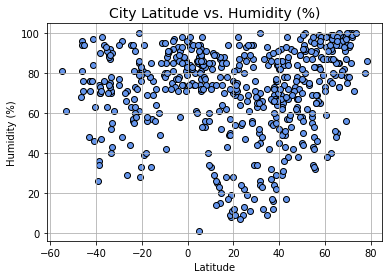

The plot shows where a city falls based on its latitude and humidity levels. Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and humidity levels. However, there does appear to be some clustering in the middle-left and upper-right corner of the plot.


In [20]:
# Create a scatter plot of City Latitude vs. Humidity
x_axis2 = weather_df['Lat']
y_axis2 = weather_df['Humidity']

plt.scatter(x_axis2, y_axis2, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%)', fontsize = 14)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Humidity.png')

plt.show()

print('The plot shows where a city falls based on its latitude and humidity levels. Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and humidity levels. However, there does appear to be some clustering in the middle-left and upper-right corner of the plot.')

### Cloudiness (%) vs. Latitude

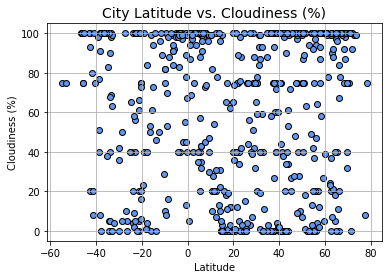

The plot shows where a city falls based on its latitude and cloudiness levels. Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and cloudiness levels.


In [21]:
# Create a scatter plot of City Latitude vs. Cloudiness
x_axis3 = weather_df['Lat']
y_axis3 = weather_df['Cloudiness']

plt.scatter(x_axis3, y_axis3, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)', fontsize = 14)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Cloudiness.png')

plt.show()

print('The plot shows where a city falls based on its latitude and cloudiness levels. Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and cloudiness levels.')

### Wind Speed (mph) vs. Latitude

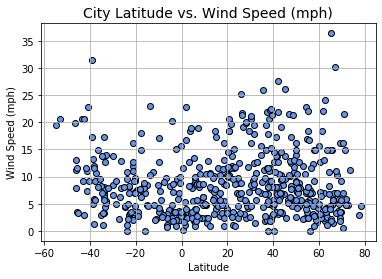

The plot shows where a city falls based on its latitude and wind speed. Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and wind speed. However, the plot does show that wind speed rarely goes above 20 mph in the cities selected.


In [22]:
# Create a scatter plot of City Latitude vs. Cloudiness
x_axis4 = weather_df['Lat']
y_axis4 = weather_df['Wind Speed']

plt.scatter(x_axis4, y_axis4, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph)', fontsize = 14)
plt.grid(True)

plt.savefig('Weather_Output/City Latitude vs. Wind Speed.png')

plt.show()

print('The plot shows where a city falls based on its latitude and wind speed. Based on how scattered the plot is, there does not appear to be a strong relationship between city latitude and wind speed. However, the plot does show that wind speed rarely goes above 20 mph in the cities selected.')

## Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemp = weather_df.loc[weather_df['Lat'] >= 0, :]
southern_hemp = weather_df.loc[weather_df['Lat'] < 0, :]

In [32]:
# Define a function for the line regressions to perform on the northern_hemp and southern_hemp dataframes
def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black', s = x_axis_lreg)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    print(f'The r-square value is: {round(rvalue**2,2)}.')

### Northern Hemisphere - Temperature (F) vs. Latitude

The r-square value is: 0.77.


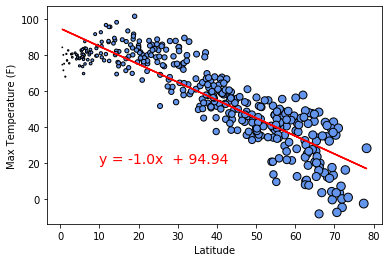

In [33]:
linear_regression(northern_hemp['Lat'], northern_hemp['Max Temp'], 'Latitude', 'Max Temperature (F)', 10, 20)

### Southern Hemisphere - Temperature (F) vs. Latitude

### Northern Hemisphere - Humidity (%) vs. Latitude

### Southern Hemisphere - Humidity (%) vs. Latitude

### Northern Hemisphere - Cloudiness (%) vs. Latitude

### Southern Hemisphere - Cloudiness (%) vs. Latitude

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

### Southern Hemisphere - Wind Speed (mph) vs. Latitude